In [2]:
import nltk

In [5]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
text.similar('woman')

man time day year car moment world family house country child boy
state job way war girl place word work


In [9]:
tagged_token = nltk.tag.str2tuple('fly/NN')
tagged_token

('fly', 'NN')

In [10]:
nltk.corpus.brown.tagged_words()[:5]

[(u'The', u'AT'),
 (u'Fulton', u'NP-TL'),
 (u'County', u'NN-TL'),
 (u'Grand', u'JJ-TL'),
 (u'Jury', u'NN-TL')]

In [15]:
nltk.corpus.sinica_treebank.tagged_words()[:5]

[(u'\u4e00', u'Neu'),
 (u'\u53cb\u60c5', u'Nad'),
 (u'\u5609\u73cd', u'Nba'),
 (u'\u548c', u'Caa'),
 (u'\u6211', u'Nhaa')]

In [3]:
from operator import itemgetter

brown_news_tagged = nltk.corpus.brown.tagged_words(categories='news', tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
sorted(tag_fd.items(), key=itemgetter(1), reverse=True)[:5]

[(u'NOUN', 30640),
 (u'VERB', 14399),
 (u'ADP', 12355),
 (u'.', 11928),
 (u'DET', 11389)]

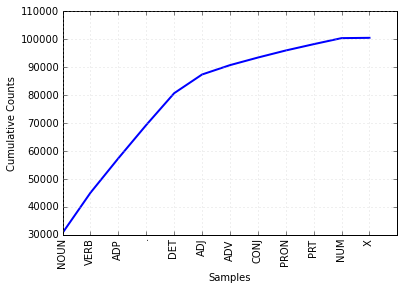

In [27]:
tag_fd.plot(cumulative=True)

In [33]:
brown_news_tagged[:5]

[(u'The', u'DET'),
 (u'Fulton', u'NOUN'),
 (u'County', u'NOUN'),
 (u'Grand', u'ADJ'),
 (u'Jury', u'NOUN')]

In [37]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)
tag_bef_noun_fd = nltk.FreqDist(a[1] for (a, b) in word_tag_pairs if b[1] == 'NOUN')
sorted(tag_fd.items(), key=itemgetter(1), reverse=True)[:5]  # What tag comes before NOUN

[(u'NOUN', 30640),
 (u'VERB', 14399),
 (u'ADP', 12355),
 (u'.', 11928),
 (u'DET', 11389)]

In [50]:
# Most common verbs in the news
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist(wsj)
word_tag_fd_sorted = sorted(word_tag_fd.items(), key=itemgetter(1), reverse=True)
word_tag = [(word, tag) for (word, tag), count in word_tag_fd_sorted]
[word + '/' + tag for (word, tag) in word_tag if tag.startswith('V')][:5]

[u'is/VERB', u'said/VERB', u'was/VERB', u'are/VERB', u'be/VERB']

In [52]:
cfd1 = nltk.ConditionalFreqDist(wsj)
cfd1['yield'].items()

[(u'VERB', 28), (u'NOUN', 20)]

In [57]:
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)
cfd2['VERB'].items()[:5]

[(u'limited', 6),
 (u'resist', 2),
 (u'Pick', 1),
 (u'sleep', 2),
 (u'consists', 1)]

In [58]:
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                   if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].keys()[:5]) for tag in cfd.conditions())

In [59]:
tagdict = findtags('NN', nltk.corpus.brown.tagged_words(categories='news'))
for tag in sorted(tagdict):
    print tag, tagdict[tag]

NN [u'inning', u'pardon', u'sunbonnet', u'temperament', u'hitch']
NN$ [u"junior's", u"player's", u"wife's", u"layman's", u"coach's"]
NN$-HL [u"Golf's", u"Navy's"]
NN$-TL [u"House's", u"Art's", u"University's", u"U.'s", u"Department's"]
NN-HL [u'son', u'help', u'show', u'lack', u'rest']
NN-NC [u'eva', u'ova', u'aya']
NN-TL [u'Communisn', u'Communism', u'Secretary-General', u'Monthly', u'Self']
NN-TL-HL [u'City', u'Commissioner', u'Grove', u'House', u'Oak']
NNS [u'wetlands', u'hats', u'facilities', u'woods', u'$12.50']
NNS$ [u"steelmakers'", u"taxpayers'", u"teammates'", u"bishops'", u"owners'"]
NNS$-HL [u"Dealers'", u"Idols'"]
NNS$-TL [u"Officers'", u"States'", u"Bombers'", u"Falcons'", u"Princes'"]
NNS-HL [u'years', u'idols', u'Creations', u'thanks', u'centers']
NNS-TL [u'Gables', u'Broncos', u'Hills', u'Workers', u'Ministers']
NNS-TL-HL [u'Nations']


In [4]:
from nltk.corpus import brown

brown_learned_text = brown.words(categories='learned')
sorted(set(b for (a, b) in nltk.bigrams(brown_learned_text) if a == 'often'))[:7]

[u',',
 u'.',
 u'accomplished',
 u'analytically',
 u'appear',
 u'apt',
 u'associated']

In [66]:
# What POS tag follows a word
brown_lrnd_tagged = brown.tagged_words(categories='learned', tagset='universal')
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']
fd = nltk.FreqDist(tags)
fd.tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


In [1]:
from collections import defaultdict

a = defaultdict(lambda: 'N')
a[3]

'N'

In [83]:
alice = nltk.corpus.gutenberg.words('carroll-alice.txt')
vocab = nltk.FreqDist(alice)
v1000 = list(vocab)[1:1000]
mapping = defaultdict(lambda: 'UNK')
for v in v1000:
    mapping[v] = v

alice2 = [mapping[v] for v in alice]
print alice2[:5]
len(set(alice)), len(set(alice2))

[u'[', u'Alice', 'UNK', 'UNK', u'Adventures']


(3016, 1000)

In [87]:
words = nltk.corpus.words.words('en')
anagrams = defaultdict(list)

for word in words:
    key = ''.join(sorted(word))
    anagrams[key].append(word)
    
anagrams['aeilnrt']

[u'entrail', u'latrine', u'ratline', u'reliant', u'retinal', u'trenail']

In [92]:
pos = defaultdict(lambda: defaultdict(int))
brown_news_tagged =  brown.tagged_words(categories='news', tagset='universal')
for ((w1,t1), (w2,t2)) in nltk.bigrams(brown_news_tagged):
     pos[(t1, w2)][t2] += 1
     
pos[('DET', 'right')]

defaultdict(<type 'int'>, {u'ADJ': 11, u'NOUN': 5})

In [93]:
patterns = [
(r'.*ing$', 'VBG'), 
(r'.*ed$', 'VBD'), 
(r'.*es$', 'VBZ'), 
(r'.*ould$', 'MD'), 
(r'.*\'s$', 'NN$'), 
(r'.*s$', 'NNS'), 
(r'^-?[0-9]+(.[0-9]+)?$', 'CD'), 
(r'.*', 'NN') 
]

In [98]:
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

In [97]:
regexp_tagger = nltk.RegexpTagger(patterns)
regexp_tagger.tag(brown_sents[3][:10])

[(u'``', 'NN'),
 (u'Only', 'NN'),
 (u'a', 'NN'),
 (u'relative', 'NN'),
 (u'handful', 'NN'),
 (u'of', 'NN'),
 (u'such', 'NN'),
 (u'reports', 'NNS'),
 (u'was', 'NNS'),
 (u'received', 'VBD')]

In [99]:
regexp_tagger.evaluate(brown_tagged_sents)

0.20326391789486245

In [5]:
from collections import OrderedDict

fd = nltk.FreqDist(brown.words(categories='news'))
fd = OrderedDict(sorted(fd.items(), key=itemgetter(1), reverse=True))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))

most_freq_words = fd.keys()[:100]
likely_tags = dict((word, cfd[word].max()) for word in most_freq_words)
baseline_tagger =  nltk.UnigramTagger(model=likely_tags)
baseline_tagger.evaluate(brown_tagged_sents)

NameError: name 'brown_tagged_sents' is not defined

In [121]:
cfd['the'], cfd['the'].max()

(FreqDist({u'AT': 5558, u'AT-TL': 18, u'AT-HL': 4}), u'AT')

In [108]:
baseline_tagger =  nltk.UnigramTagger(model=likely_tags, backoff=nltk.DefaultTagger('NN'))
baseline_tagger.evaluate(brown_tagged_sents)

0.5817769556656125

In [109]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

In [117]:
words_by_freq = nltk.FreqDist(brown.words(categories='news'))
words_by_freq = sorted(fd.items(), key=itemgetter(1), reverse=True)
words_by_freq = list(OrderedDict(words_by_freq))
words_by_freq[:5]

[u'the', u',', u'.', u'of', u'and']

In [118]:
def display():
    import pylab
    # words_by_freq = list(nltk.FreqDist(brown.words(categories='news')))
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(12)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

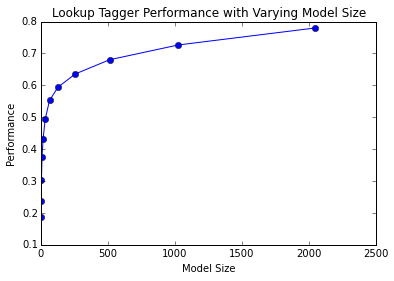

In [119]:
display()

**Automatic Tagging**

In [9]:
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

In [18]:
size = int(len(brown_tagged_sents) * 0.9)
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

0.8120203329014253

In [20]:
unigram_tagger = nltk.BigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)  # Low value because frequency of occurence of w1 AND w2 can be 0 / very low

0.10276088906608193

In [24]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)

0.844911791089405

In [26]:
# POS Ambiguity
cfd = nltk.ConditionalFreqDist(
    ((x[1], y[1], z[0]), z[1]) 
    for sent in brown_tagged_sents
    for x,y,z in nltk.trigrams(sent))
ambiguous_context = [c for c in cfd.conditions() if len(cfd[c]) > 1]
1.0 * sum(cfd[c].N() for c in ambiguous_context) / cfd.N()  # 1 out of 20 trigrams are ambiguous

0.049297702068029296

In [ ]:
test_tags = [tag for sent in brown.sents(categories='editorial')
             for (word, tag) in t2.tag(sent)]
gold_tags = [tag for (word, tag) in brown.tagged_words(categories='editorial')]
print(nltk.ConfusionMatrix(gold_tags, test_tags))